<b>Playground<b>

In [ ]:
To find the "best" communities, we need to know how much entertainment content is a good measure of a community. Therefore, I selected the dataset of playground in the city for analysis in the database.

In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("47350364-44a8-4d15-b6e0-5f79ddff9367.csv")
df = df.dropna(1)
df.head(125)

<ipython-input-25-446365c6d824>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna(1)


,id,name,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
...,...,...,...,...,...,...,...,...,...,...,...,...
120,1199980206,Phillips Lower Playground,Carrick,4,29,42003290400,3,29,3,4-23,40.388144,-79.990309
121,2108783707,Duncan Park Playground,Upper Lawrenceville,7,10,42003101100,2,10,2,3-5,40.480246,-79.948461
122,675610013,McKinley Upper Playground,Beltzhoover,4,18,42003562400,5,18,3,4-16,40.415730,-80.002950
123,1683700344,Liberty Green Playground,East Liberty,9,11,42003111500,2,11,5,3-10,40.462951,-79.919097


The first thing I show you is the whole data, and you can see that it's 125 lines, so it's a lot of information.

I notice the latitude and longitude of play Group HND in the later columns of the dataset table

So I made the latitude and longitude chart below

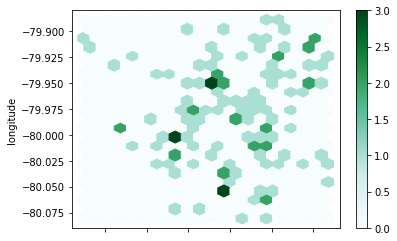

In [26]:
df.plot.hexbin(x='latitude', y='longitude', gridsize=20)

Although we can see the dark dots on the icon, we still don't know exactly which neighborhoods these dark dots are.

So I'm going to list all the communities

In [27]:
data = pd.read_csv("47350364-44a8-4d15-b6e0-5f79ddff9367.csv", index_col="neighborhood", parse_dates=True)
data.head(125)

,id,name,type,maintenance_responsibility,park,street,image,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,
Beechview,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
Crawford-Roberts,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
Central Northside,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
Beechview,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
Bedford Dwellings,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Carrick,1199980206,Phillips Lower Playground,NaN,NaN,NaN,NaN,NaN,4,29,42003290400,3,29,3,4-23,40.388144,-79.990309
Upper Lawrenceville,2108783707,Duncan Park Playground,NaN,NaN,Duncan Park,DUNCAN ST,NaN,7,10,42003101100,2,10,2,3-5,40.480246,-79.948461
Beltzhoover,675610013,McKinley Upper Playground,NaN,NaN,McKinley Park,MICHIGAN ST,NaN,4,18,42003562400,5,18,3,4-16,40.415730,-80.002950


In [ ]:
I then tried the following chart, which I found to be of little use.

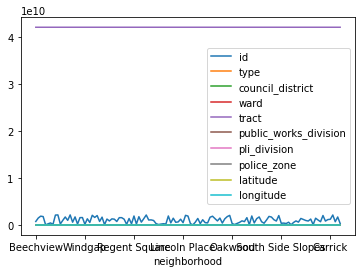

In [28]:
data.plot()

Therefore, I found that the number of playground owned by each community could be obtained by counting the number of times that each community appeared in the table.

In [29]:
import csv

with open('47350364-44a8-4d15-b6e0-5f79ddff9367.csv') as f:
    center_neighborhood_pandas = [row for row in csv.reader(f)]

In [31]:
center_counter = dict()

for row in center_neighborhood_pandas[1:]:
    center = row[7]
    
    if center not in center_counter:
        center_counter[center] = 1
    else:
        center_counter[center] = center_counter[center] + 1
center_counter

{'Beechview': 5,
 'Crawford-Roberts': 3,
 'Central Northside': 2,
 'Bedford Dwellings': 1,
 'South Side Slopes': 5,
 'South Side Flats': 2,
 'Lower Lawrenceville': 1,
 'Banksville': 1,
 'Homewood North': 1,
 'Bon Air': 1,
 'Central Oakland': 1,
 'Brighton Heights': 2,
 'Brookline': 2,
 'Hazelwood': 3,
 'Squirrel Hill South': 8,
 'Spring Garden': 1,
 'Lincoln-Lemington-Belmar': 2,
 'Windgap': 1,
 'Troy Hill': 2,
 'Westwood': 1,
 'Perry South': 1,
 'Homewood West': 1,
 'Allegheny Center': 4,
 'Strip District': 1,
 'Stanton Heights': 1,
 'Crafton Heights': 2,
 'West Oakland': 1,
 'East Carnegie': 1,
 'Duquesne Heights': 1,
 'East Liberty': 3,
 'Esplen': 1,
 'Fairywood': 1,
 'Highland Park': 4,
 'Upper Lawrenceville': 3,
 'Fineview': 1,
 'Regent Square': 1,
 'Garfield': 2,
 'Greenfield': 2,
 'South Oakland': 3,
 'Allentown': 1,
 'Hays': 1,
 'Elliott': 3,
 'Morningside': 2,
 'Terrace Village': 1,
 'Larimer': 1,
 'Carrick': 3,
 'Central Lawrenceville': 1,
 'Lincoln Place': 2,
 'Manchester': 

By looking at the list above, I found that squirrel Hill South had the most playground. There are eight of them.

These are the places with the most playgrounds, Squirrel Hill South, Beechview, South Side Slopes,Sheraden,Allegheny Center, Highland Park,Beltzhoover,Carrick

<b>Pools<b>

In [4]:
data = pd.read_csv("Pools.csv")
data.head()

print("# of pools:")
poolnum = data.groupby("neighborhood")['id'].count()
#prints the number of pools in each neighborhood
poolnum

# of pools:


neighborhood
Allegheny Center            1
Banksville                  1
Bedford Dwellings           1
Beechview                   1
Beltzhoover                 1
Bloomfield                  1
Brighton Heights            1
Brookline                   1
Carrick                     1
East Hills                  1
Greenfield                  1
Hazelwood                   1
Highland Park               2
Homewood South              1
Lincoln Place               1
Lincoln-Lemington-Belmar    1
Mount Washington            1
Perry North                 1
Polish Hill                 1
Shadyside                   1
Sheraden                    1
South Side Flats            2
South Side Slopes           1
Squirrel Hill South         1
Troy Hill                   1
Westwood                    1
Name: id, dtype: int64

In [5]:
print("# of each type of pool:")
numt = data.groupby("type")['id'].count()
numt

# of each type of pool:


type
Pool          20
Spray Park     8
Name: id, dtype: int64

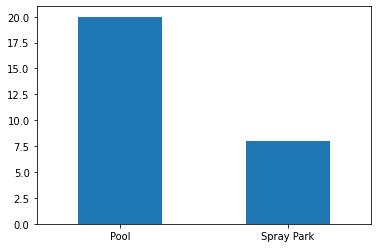

In [6]:
data["type"].value_counts().sort_index().plot(kind='bar', rot=0)

In [14]:
print("# of each water source company:")
source_type = data.groupby("water_source")['id'].count()
source_type

# of each water source company:


water_source
Pennsylvania American Water              8
Pittsburgh Water and Sewer Authority    19
Wilkinsburg Penn                         1
Name: id, dtype: int64

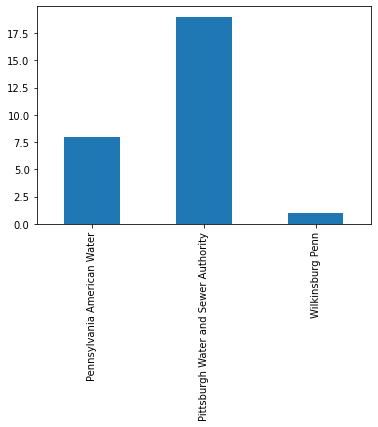

In [11]:
data["water_source"].value_counts().sort_index().plot(kind='bar', rot=90)


In [15]:
print(data[['neighborhood', 'capacity']])
maxvalu = data['capacity'].max()
maxvalu
max_index = data[['capacity']].idxmax()
print("\nlargest water capacity: ")
data.iloc[max_index, 7]

                neighborhood  capacity
0          Bedford Dwellings  538000.0
1                 Banksville  166320.0
2                  Beechview       NaN
3                 Bloomfield  335000.0
4                  Hazelwood       NaN
5                  Troy Hill       NaN
6                 East Hills       NaN
7              Highland Park       NaN
8              Highland Park  560242.0
9             Homewood South  171075.0
10          Brighton Heights  205800.0
11                Greenfield  195000.0
12             Lincoln Place   18000.0
13                 Shadyside       NaN
14                 Brookline  417657.0
15          South Side Flats  107000.0
16          South Side Flats  205800.0
17                   Carrick  224100.0
18          Mount Washington  356000.0
19               Perry North  205800.0
20       Squirrel Hill South  187600.0
21                  Sheraden  278000.0
22          Allegheny Center  271000.0
23               Beltzhoover       NaN
24               Polish H

8    Highland Park
Name: neighborhood, dtype: object

<b>Courts<b>

In [16]:
df = pd.read_csv("a5b71bfa-840c-4c86-8f43-07a9ae854227.csv")
df = df.dropna(1)
df.head(246)

<ipython-input-16-c631548f728b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna(1)


,id,name,type,park,grandstand,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,0,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,0,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,0,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,0,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,0,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1256692000,Riverview Park Tennis Court 2,Tennis,Riverview Park,0,Perry North,1,26,42003980400,1,26,1,1-15,40.482342,-80.022263
242,1802795636,West End Park Basketball Court,Basketball (Half),West End Park,0,Elliott,2,20,42003562600,5,20,6,1-17,40.437395,-80.036929
243,529313558,Frick Park Pickleball Court 1,Pickleball,Frick Park,0,Squirrel Hill South,5,14,42003980300,3,14,4,2-21,40.429997,-79.914029
244,1330544431,Frick Park Pickleball Court 2,Pickleball,Frick Park,0,Squirrel Hill South,5,14,42003980300,3,14,4,2-21,40.429906,-79.914023


In [17]:
data = pd.read_csv("a5b71bfa-840c-4c86-8f43-07a9ae854227.csv", index_col="neighborhood", parse_dates=True)
data.head(246)

,id,name,type,park,location,surface_material,grandstand,inactive,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,
Allegheny Center,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
Allegheny Center,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
Allegheny Center,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
Allegheny Center,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
Beechview,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Perry North,1256692000,Riverview Park Tennis Court 2,Tennis,Riverview Park,NaN,NaN,0,NaN,1,26,42003980400,1,26,1,1-15,40.482342,-80.022263
Elliott,1802795636,West End Park Basketball Court,Basketball (Half),West End Park,NaN,Asphalt,0,NaN,2,20,42003562600,5,20,6,1-17,40.437395,-80.036929
Squirrel Hill South,529313558,Frick Park Pickleball Court 1,Pickleball,Frick Park,NaN,Asphalt,0,NaN,5,14,42003980300,3,14,4,2-21,40.429997,-79.914029


In [18]:
import csv

with open('a5b71bfa-840c-4c86-8f43-07a9ae854227.csv') as f:
    center_neighborhood_pandas = [row for row in csv.reader(f)]

In [19]:

center_counter = dict()

for row in center_neighborhood_pandas[1:]:
    center = row[8]
    
    if center not in center_counter:
        center_counter[center] = 1
    else:
        center_counter[center] = center_counter[center] + 1
center_counter

{'Allegheny Center': 9,
 'Beechview': 7,
 'Bedford Dwellings': 2,
 'South Side Slopes': 6,
 'South Side Flats': 5,
 'Lower Lawrenceville': 6,
 'Crawford-Roberts': 2,
 'Banksville': 3,
 'Bon Air': 1,
 'Central Oakland': 1,
 'Brighton Heights': 2,
 'Brookline': 9,
 'Hazelwood': 10,
 'Lincoln-Lemington-Belmar': 2,
 'Troy Hill': 8,
 'Perry South': 1,
 'Homewood West': 1,
 'Squirrel Hill South': 26,
 'Strip District': 1,
 'Stanton Heights': 2,
 'Crafton Heights': 3,
 'Upper Lawrenceville': 2,
 'East Carnegie': 2,
 'East Hills': 2,
 'Duquesne Heights': 2,
 'Allentown': 1,
 'Mount Washington': 5,
 'East Liberty': 6,
 'Fairywood': 2,
 'Fineview': 2,
 'Garfield': 3,
 'Greenfield': 5,
 'South Oakland': 2,
 'Point Breeze': 2,
 'Regent Square': 6,
 'Hays': 1,
 'Elliott': 5,
 'Morningside': 4,
 'Highland Park': 20,
 'Central Northside': 2,
 'Terrace Village': 5,
 'Larimer': 1,
 'Spring Hill-City View': 4,
 'Carrick': 3,
 'Central Lawrenceville': 1,
 'Manchester': 6,
 'Marshall-Shadeland': 1,
 'Linc

In [20]:
different_courts = data.groupby("type")['id'].count()
different_courts = different_courts.sort_values()
different_courts

type
Horseshoe Pit         2
Lawn Bowling          2
Dek Hockey            5
Volleyball            5
General Sports        6
Bocce                 8
Street Hockey         8
Pickleball           12
Hockey               14
Basketball (Half)    23
Tennis               73
Basketball (Full)    88
Name: id, dtype: int64

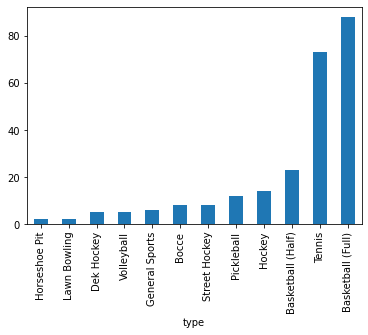

In [21]:
different_courts.plot.bar()

<b>Comclusion<b>

We compared what we each chose as the greatest neighborhood in Pittsburgh based on our separate datasets in order to reach a final judgement on the finest neighborhood in Pittsburgh. After considering all of our findings, we came to the conclusion that Squirrel Hill South is the best neighborhood in Pittsburgh. It has the greatest number of courts and rinks, as well as the greatest number of playgrounds. It may not have the most pools but still has a considerable amount. Overall, Squirrel Hill South was the greatest of the three neighborhoods, it's a fantastic community for both outdoor and indoor activities.